<a href="https://colab.research.google.com/github/IsabelleEve/NLP-Classification-Project-/blob/Baseline-Starting-Classification-Code/Classification_Analysis_for_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Analysis for Amazon Reviews
https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products

In [97]:
# Import libraries
import tensorflow as tf
import os
!pip install opendatasets
import opendatasets as od
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
od.download("https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?resource=download")
#key f5f7974f13551dff1ba75f9e8e7aa0ba

Skipping, found downloaded files in "./consumer-reviews-of-amazon-products" (use force=True to force download)


In [99]:
amazon_data=pd.read_csv(Path("/content/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"),encoding='mac_roman')
amazon_data.head() 

,Ôªøid,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


array(['Electronics', 'Electronics,Hardware',
       'Office Supplies,Electronics', 'Electronics,Media'], dtype=object)

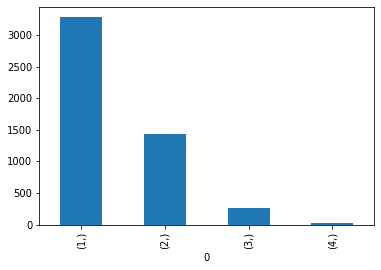

In [100]:
#quick EDA
amazon_data["primaryCategories"].nunique()
temp=pd.factorize(amazon_data.primaryCategories)[0] + 1
cats_plot=pd.DataFrame(temp).value_counts().plot(kind='bar')
amazon_data["primaryCategories"].unique()


In [101]:
raw_free_text=amazon_data["categories"].astype(str)
print(type(raw_free_text[1]))
category_labels=amazon_data["primaryCategories"]
#df = pd.Categorical(category_labels)
#category_labels = df.codes
category_labels = category_labels.astype('category').cat.codes

#check for null values
print(raw_free_text.isnull().values.any())
#print(category_labels.isnull().values.any())

from sklearn.model_selection import train_test_split
# split into training and test sets
free_text_train, free_text_test, category_train, category_test = train_test_split(raw_free_text, category_labels, test_size=0.2, random_state=1000)
# split training set into training and validation sets
free_text_train, free_text_val, category_train, category_val = train_test_split(free_text_train, category_train, test_size=0.1, random_state=1000)

<class 'str'>
False


In [102]:
raw_train_ds=tf.data.Dataset.from_tensor_slices((free_text_train, category_train)).batch(32)
raw_val_ds=tf.data.Dataset.from_tensor_slices((free_text_val, category_val)).batch(32)
raw_test_ds=tf.data.Dataset.from_tensor_slices((free_text_test, category_test)).batch(32)

tf.print(raw_train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int8, name=None))>


In [103]:
# view train dataset
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print(f"Review: {text_batch.numpy()[i]}")
        print(f"Label: {label_batch.numpy()[i]}")
        print()
 # .numpy() converts tensor object into numpy.ndarray object. Implicitly means converted tensor will be now processed on the CPU.

Review: b'Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants'
Label: 1

Review: b'Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets'
Label: 0

Review: b'Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants'
Label: 1



# Prepare dataset for training

In [104]:
# remove HTML tag
#reviews contain various HTML tags like <br />. These tags will not be removed by the default standardizer in the TextVectorization layer
#(which converts text to lowercase and strips punctuation by default, but doesn’t strip HTML). 
import re
import string
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data) #convert all strings to lowercase
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    
    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation), #string.punctation is a list of punctuation characters
                                  '') #strips punctation

In [105]:
#standardise tokens and vectorise data
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization #A preprocessing layer which maps text features to integer sequences.

max_features = 10000 
sequence_length = 250
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features, #Maximum size of the vocabulary for this layer. This should only be specified when adapting a vocabulary or when setting pad_to_max_tokens=True 
    output_mode='int', #create unique integer indices for each token
    output_sequence_length=sequence_length) #Output will have its time dimension padded or truncated to exactly output_sequence_length values, resulting in a tensor of shape (batch_size, output_sequence_length) regardless of how many tokens resulted from the splitting step. Defaults to None.

**TextVectorization**
Transforms a batch of strings (one example = one string) into either a list of token indices (one example = 1D tensor of integer token indices) or a dense representation (one example = 1D tensor of float values representing data about the example's tokens). This layer is meant to handle natural language inputs. 

The vocabulary for the layer must be either supplied on construction or learned via adapt(). When this layer is adapted, it will analyze the dataset, determine the frequency of individual string values, and create a vocabulary from them. This vocabulary can have unlimited size or be capped, depending on the configuration options for this layer; if there are more unique values in the input than the maximum vocabulary size, the most frequent terms will be used to create the vocabulary.

The processing of each example contains the following steps:

* Standardize each example (usually lowercasing + punctuation stripping)
* Split each example into substrings (usually words)
* Recombine substrings into tokens (usually ngrams)
* Index tokens (associate a unique int value with each token)
* Transform each example using this index, either into a vector of ints or a dense float vector.

In [106]:
#Call adapt to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.
train_text = raw_train_ds.map(lambda x, y: x) #map(func, seq)  applies the function func to all the elements of the sequence seq
#lamda function extracts just text? (i.e not label)
vectorize_layer.adapt(train_text) #causes the layer to learn a vocabulary of the most frequent terms in all documents, capped at a max of 10000

In [107]:
#function to preprocess data
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1) #Remove dimension from vector
    return vectorize_layer(text), label

In [108]:
#Retrieve a batch of 32 reviews and labels from the dataset

text_batch, label_batch = next(iter(raw_train_ds)) #return iterator
first_review, first_label = text_batch[0], label_batch[0] #first element of iterator
print("Review", first_review)
print("Label", first_label)
print("Vectorized review", vectorize_text(first_review, first_label))
#each token replace by integer then notice zero padding at end

Review tf.Tensor(b'Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants', shape=(), dtype=string)
Label tf.Tensor(1, shape=(), dtype=int8)
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[41, 20,  6, 35, 31, 42, 10, 16, 33, 23,  4, 40, 36,  9,  6, 32,
         3, 43, 19,  8,  7,  5, 45, 39, 18, 37, 38, 34,  9, 44,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  

In [109]:
#see the token (string) that each integer corresponds to by calling .get_vocabulary() on the layer
print("12 ---> ",vectorize_layer.get_vocabulary()[12])
print(" 31 ---> ",vectorize_layer.get_vocabulary()[31])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

12 --->  ebook
 31 --->  video
Vocabulary size: 234


In [110]:
#Apply the TextVectorization layer to the train, validation, and test dataset
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

#Retrieve a batch of 32 reviews and labels from the dataset

text_batch, label_batch = next(iter(train_ds)) #return iterator
first_review, first_label = text_batch[0], label_batch[0] #first element of iterator
print("Review", first_review)
print("Label", first_label)
#each token replace by integer then notice zero padding at end

Review tf.Tensor(
[41 20  6 35 31 42 10 16 33 23  4 40 36  9  6 32  3 43 19  8  7  5 45 39
 18 37 38 34  9 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0], shape=(250,), dtype=int64)
Label tf.Tensor(1, shape=(), dtype=int8)


## Configure the dataset for performance
When loading data to make sure that I/O does not become blocking.

.cache() keeps data in memory after it’s loaded off disk. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache, which is more efficient to read than many small files.

.prefetch() overlaps data preprocessing and model execution while training.

In [111]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create a model

In [112]:
from tensorflow.keras import layers
embedding_dim = 16
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])
model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_10 (Dropout)        (None, None, 16)          0         
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
________________________________________________

In [113]:
# compile the model
from tensorflow.keras import losses
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
# train model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
113/113 [==============================] - 1s 7ms/step - loss: 5.3843e-08 - accuracy: 0.6586 - val_loss: 5.2154e-08 - val_accuracy: 0.6675
Epoch 2/10
113/113 [==============================] - 1s 6ms/step - loss: 5.3843e-08 - accuracy: 0.6586 - val_loss: 5.2154e-08 - val_accuracy: 0.6675
Epoch 3/10
113/113 [==============================] - 1s 6ms/step - loss: 5.3843e-08 - accuracy: 0.6586 - val_loss: 5.2154e-08 - val_accuracy: 0.6675
Epoch 4/10
113/113 [==============================] - 1s 13ms/step - loss: 5.3843e-08 - accuracy: 0.6586 - val_loss: 5.2154e-08 - val_accuracy: 0.6675
Epoch 5/10
113/113 [==============================] - 2s 13ms/step - loss: 5.3843e-08 - accuracy: 0.6586 - val_loss: 5.2154e-08 - val_accuracy: 0.6675
Epoch 6/10
113/113 [==============================] - 2s 14ms/step - loss: 5.3843e-08 - accuracy: 0.6586 - val_loss: 5.2154e-08 - val_accuracy: 0.6675
Epoch 7/10
113/113 [==============================] - 1s 12ms/step - loss: 5.3843e-08 - accuracy:

In [115]:
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)


32/32 [==============================] - 0s 2ms/step - loss: 5.6863e-08 - accuracy: 0.6380
Loss:  5.686283444106266e-08
Accuracy:  0.6380000114440918
